## HealthCare Billing Cost Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
##Reads the data set from csv
df = pd.read_csv('data/healthcare_dataset.csv')

## displays top 5 entries
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [10]:
## Shows shape of data
df.shape

(55500, 15)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical columns

### 3.1 Check Missing values

In [11]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

##Deletes Duplicates
df = df.drop_duplicates()

df.duplicated().sum()


0

In [15]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


### 3.4 Checking the number of unique values of each column

In [16]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

### 3.5 Check statistics of data set

In [17]:
df.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


#### Insight
- Billing amount mean ~$25500
- Standard deviation for billing amount is quite high
- Possible Negative billing amount

### 3.7 Exploring Data

In [18]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [21]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Medical Condition' variable:  ",end=" ")
print(df['Medical Condition'].unique())


print("Categories in 'Hospital' variable:     ",end=" " )
print(df['Hospital'].unique())

print("Categories in 'Insurance Provider' variable:     ",end=" " )
print(df['Insurance Provider'].unique())

print("Categories in 'Admission Type' variable:     ",end=" " )
print(df['Admission Type'].unique())

print("Categories in 'Test Results' variable:     ",end=" " )
print(df['Test Results'].unique())

print("Categories in 'Medication' variable:     ",end=" " )
print(df['Medication'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Medical Condition' variable:   ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Categories in 'Hospital' variable:      ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
Categories in 'Insurance Provider' variable:      ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Categories in 'Admission Type' variable:      ['Urgent' 'Emergency' 'Elective']
Categories in 'Test Results' variable:      ['Normal' 'Inconclusive' 'Abnormal']
Categories in 'Medication' variable:      ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']


In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Age', 'Billing Amount', 'Room Number']

We have 12 categorical features : ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

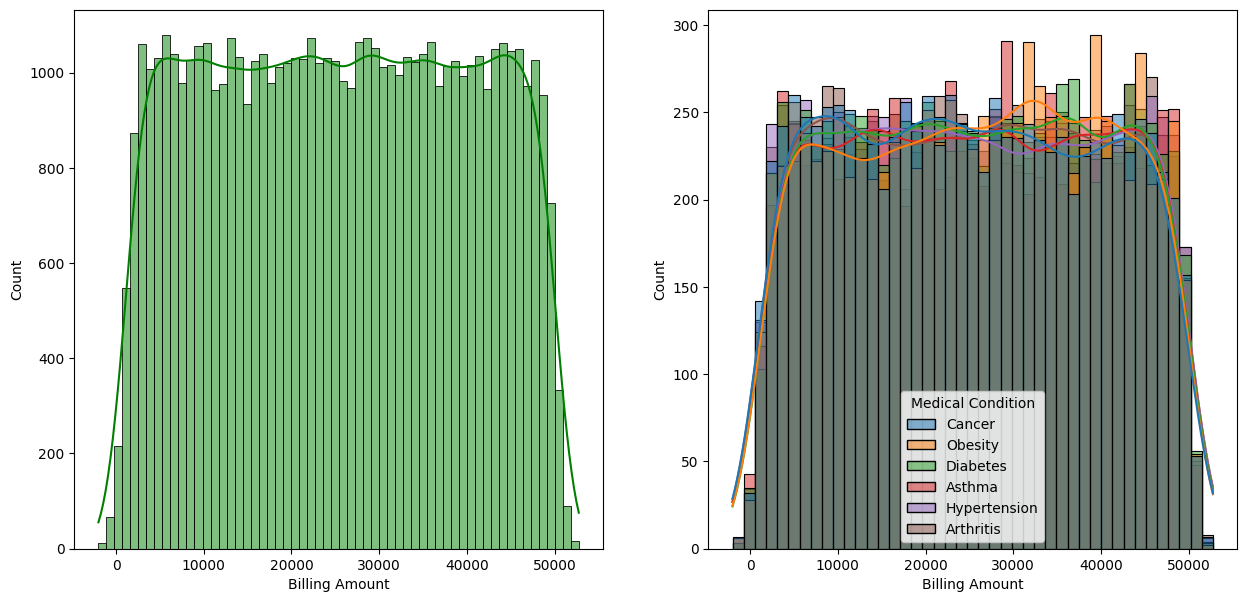

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Billing Amount',bins=60,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Billing Amount',kde=True,hue='Medical Condition')
plt.show()

#####  Insights
- Uniform distribution overall
- Yet more varaiation when looking at condition

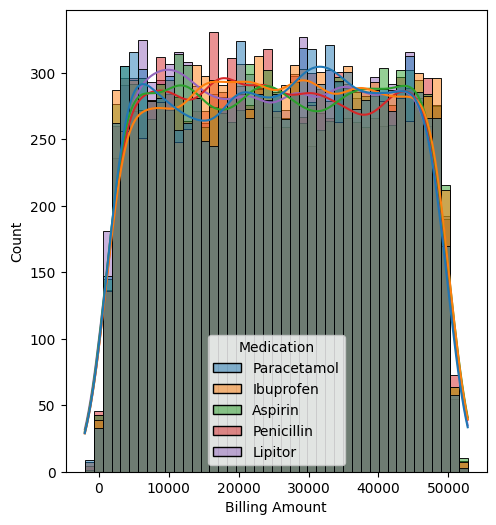

In [29]:
plt.subplots(1,1,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Billing Amount',kde=True,hue='Medication')
plt.show()

#####  Insights
- Uniform distribution overall
- Yet more varaiation when looking at Medication